# 参数 n_estimators下的建模

In [1]:
from xgboost import XGBRegressor as XGBR 
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR 
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold,cross_val_score as CVS,train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from time import time 
import datetime

C:\SoftDir\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\SoftDir\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\SoftDir\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# 导入数据集,数据集为字典形式
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
x= data.data
y = data.target
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [4]:
xtrain,xtest,ytrain,ytest = TTS(x,y,test_size =0.3,random_state = 420)

In [5]:
reg = XGBR(n_estimators=100).fit(xtrain,ytrain)
reg.predict(xtest)

array([ 8.165384 , 21.919355 , 29.843645 , 11.874415 ,  8.833874 ,
       20.698246 , 15.456877 , 15.544203 , 15.273806 , 13.444421 ,
       22.130966 , 35.072395 , 21.383947 , 27.477697 , 20.449163 ,
       10.434615 , 19.13851  , 24.973454 , 23.284975 , 23.22411  ,
       17.86431  , 17.218367 , 25.284815 , 20.962675 , 20.506361 ,
       16.18782  , 21.71437  , 31.687273 , 22.739857 , 15.976351 ,
       37.61867  , 20.701538 , 21.191647 , 23.53703  , 23.374733 ,
       24.682228 , 16.27922  , 24.404453 , 16.918646 , 34.06889  ,
       18.060398 , 21.352114 , 37.74781  , 17.90909  , 14.035863 ,
       28.243176 , 46.44803  , 14.748789 , 10.719417 , 35.26486  ,
       25.46181  , 21.976503 , 20.583235 , 49.3701   , 26.799538 ,
       26.286161 , 17.937538 , 20.566235 , 16.813719 , 18.816374 ,
       14.940857 , 22.213655 , 19.239632 , 30.246548 , 27.522081 ,
       18.951006 , 19.352182 , 15.716684 , 22.732222 , 19.14629  ,
       29.943521 , 43.593327 , 29.910528 , 22.987352 , 20.6698

In [6]:
# 测试集的结果分数,默认是返回R平方指标
reg.score(xtest,ytest)

0.9197580267581366

In [7]:
# 均方误差
MSE(ytest,reg.predict(xtest))

7.466827353555599

In [8]:
y.mean()
# 均方误差结果大约占y均值的三分之一，效果一般

22.532806324110677

In [9]:
# 树模型可以查看模型的重要性分数，可以使用嵌入法(select from model)进行特征选择
reg.feature_importances_

array([0.13862929, 0.0046729 , 0.02803738, 0.00623053, 0.08411215,
       0.16510904, 0.08566978, 0.15109034, 0.03271028, 0.0623053 ,
       0.06074766, 0.07632399, 0.10436137], dtype=float32)

# 使用交叉验证来进行对比

In [10]:
reg = XGBR(n_estimators=100) # 交叉验证中导入没有经过训练的模型

In [11]:
print(CVS(reg,xtrain,ytrain,cv=5))
# 1: mean 是对5次交叉验证求均值
# 2: 由于reg（XGB）默认是是R平方指标，所以交叉验证中也是返回R平方指标结果
CVS(reg,xtrain,ytrain,cv=5).mean()  

[0.83340801 0.77096033 0.83473392 0.80424149 0.76558778]


0.8017863029875325

In [12]:
CVS(reg,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.041115480238048

In [13]:
# 来查看下sklearn中的所有模型来评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [14]:
# 使用随机森林和线性回归作为对比

#随机森林
rfr = RFR(n_estimators=100)
CVS(rfr,xtrain,ytrain,cv=5).mean()

0.7947797703644435

In [15]:
CVS(rfr,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.689420085070417

In [16]:
#线性回归
lr = LinearR()
CVS(lr,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-25.349507493648424

In [17]:
# 开启参数slient ,当数据巨大，训练缓慢的时候，可以使用这个参数来监控模型的进度

reg = XGBR(n_estimators=10,silent=False)
CVS(reg,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

[09:56:25] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:56:25] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:56:25] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:56:25] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:56:25] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:56:25] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:56:25] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 prun

-92.67865836936579

学习曲线

In [18]:
def plot_learning_curve(estimator, title, X, y,ax=None,
                        ylim=None, cv=None,n_jobs=None):
    from sklearn.model_selection import learning_curve
    import numpy as np
    import matplotlib.pyplot as plt
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,shuffle=True,cv=cv,random_state=420,
                                                            n_jobs=n_jobs)
    
    if ax ==None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_title(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label="Training Score")
    ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label="Test Score")
    ax.legend(loc="best")
    
    return ax 

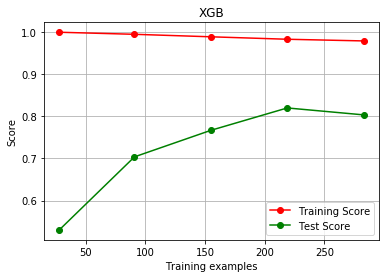

In [19]:
cv = KFold(n_splits=5,shuffle=True,random_state=42) # 交叉验证模式

plot_learning_curve(XGBR(n_estimators=100,random_state=420),"XGB",xtrain,ytrain,ax=None,cv=cv)
plt.show()

基于偏差的学习曲线

660 0.8046775284172915


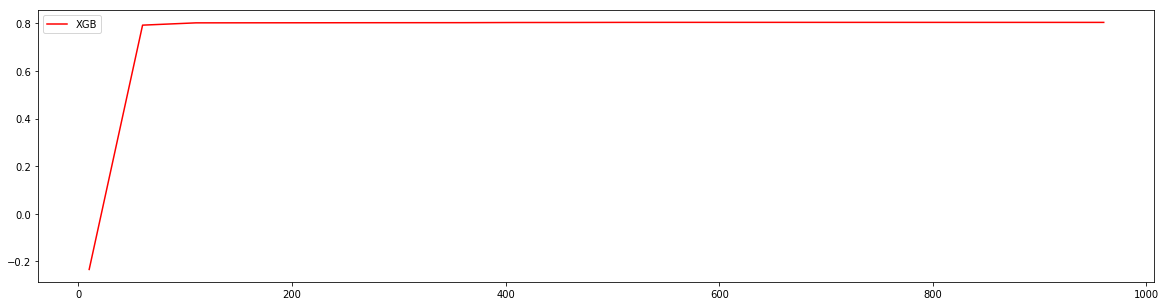

In [20]:
axisx = range(10,1010,50)
rs = []

for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,xtrain,ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

基于方差和偏差的学习曲线

450 0.8040766554180546 0.010485140168603222
50 0.7857724708830981 0.009072727885598212
150 0.8032842414878519 0.009747694343514357 0.04844478399052411


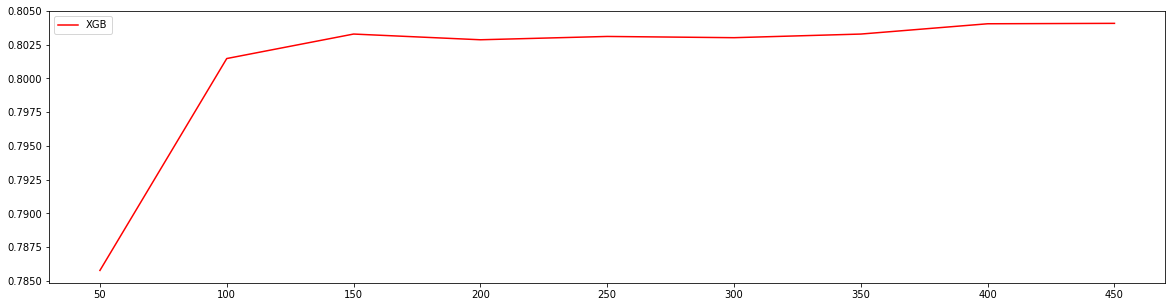

In [21]:
axisx = range(50,500,50)
rs = []
var=[]
ge =[]
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult =  CVS(reg,xtrain,ytrain,cv=cv)
    # 记录1- 偏差
    rs.append(cvresult.mean())
    # 记录方差
    var.append(cvresult.var())
    # 计算泛化误差的可控部分
    ge.append((1-cvresult.mean())**2+cvresult.var())

# 打印R2最高对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])

# 打印R2最低对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))

# # 打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

# 输出结果中，在150棵树的结果中表现最好

180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315 0.04805674671831314


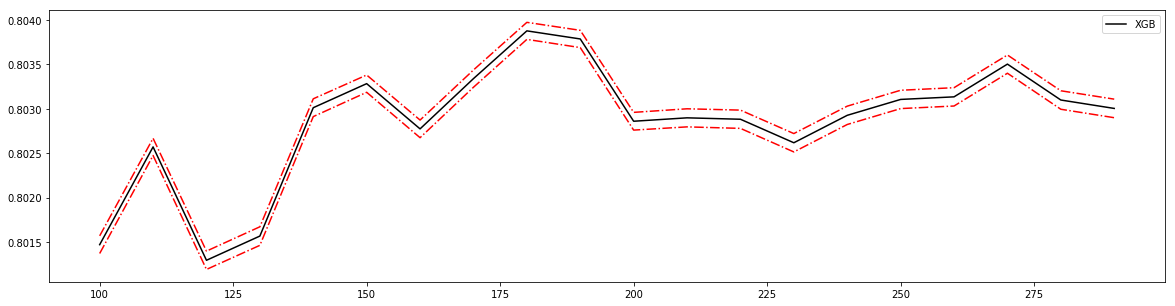

In [22]:
axisx = range(100,300,10)
rs = []
var=[]
ge =[]
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult =  CVS(reg,xtrain,ytrain,cv=cv)
    # 记录1- 偏差
    rs.append(cvresult.mean())
    # 记录方差
    var.append(cvresult.var())
    # 计算泛化误差的可控部分
    ge.append((1-cvresult.mean())**2+cvresult.var())

# 打印R2最高对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])

# 打印R2最低对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))

# # 打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
# 添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

验证模型是否真的提高

In [23]:
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(xtrain,ytrain).score(xtest,ytest))
print(time()-time0)

0.9197580267581366
0.019803285598754883


In [24]:
# 原始学习曲线表现的运行时间结果和score
time1= time()
print(XGBR(n_estimators=660,random_state=420).fit(xtrain,ytrain).score(xtest,ytest))
print(time()-time1)

0.9208745746309475
0.12804174423217773


In [25]:
time2= time()
print(XGBR(n_estimators=180,random_state=420).fit(xtrain,ytrain).score(xtest,ytest))
print(time()-time2)

# 可以看到改进后的学习曲线运行效果较好

0.9231068620728082
0.03569293022155762


# subsample参数

0.631578947368421 0.8297686756274046


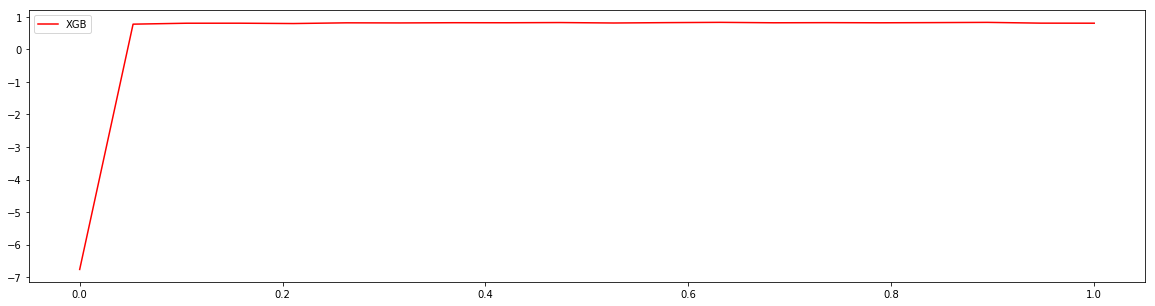

In [26]:
# 在已经确定n_estimators=180时最好的情况下，查看采用比例多少合适

axisx = np.linspace(0,1,20)
rs = []

for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(CVS(reg,xtrain,ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

0.9 0.8297619098636089 0.0060794531714634115
0.65 0.8289203775634195 0.004649972844624289
0.65 0.8289203775634195 0.004649972844624289 0.03391821005766722


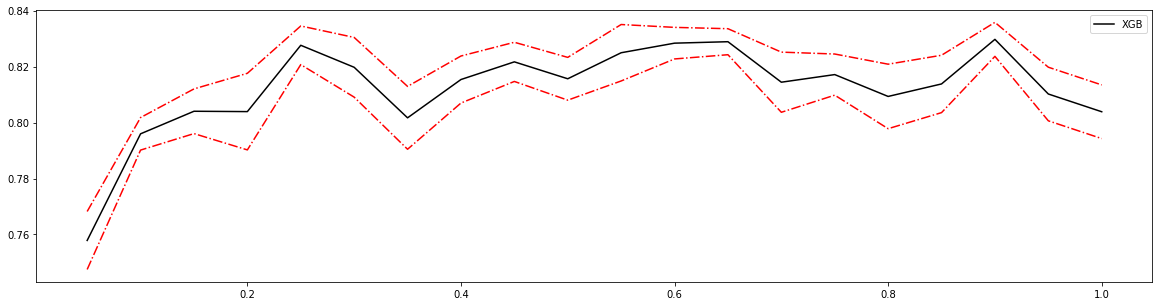

In [27]:
# 在已经确定n_estimators=180时最好的情况下，查看采用比例多少合适

axisx = np.linspace(0.05,1,20)
rs = []
var=[]
ge =[]
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult =  CVS(reg,xtrain,ytrain,cv=cv)
    # 记录1- 偏差
    rs.append(cvresult.mean())
    # 记录方差
    var.append(cvresult.var())
    # 计算泛化误差的可控部分
    ge.append((1-cvresult.mean())**2+cvresult.var())

# 打印R2最高对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])

# 打印R2最低对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))

# # 打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
# 添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

0.625 0.8332246836984973 0.005424087352155521
0.625 0.8332246836984973 0.005424087352155521
0.625 0.8332246836984973 0.005424087352155521 0.03323809347962178


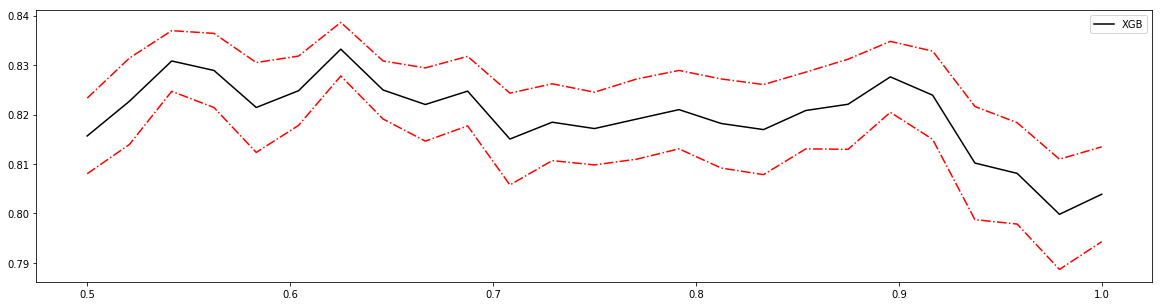

In [28]:
# 进一步细化

# 在已经确定n_estimators=180时最好的情况下，查看采用比例多少合适

axisx = np.linspace(0.5,1,25)
rs = []
var=[]
ge =[]
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult =  CVS(reg,xtrain,ytrain,cv=cv)
    # 记录1- 偏差
    rs.append(cvresult.mean())
    # 记录方差
    var.append(cvresult.var())
    # 计算泛化误差的可控部分
    ge.append((1-cvresult.mean())**2+cvresult.var())

# 打印R2最高对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])

# 打印R2最低对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))

# # 打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
# 添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

# 即采样比例为0.625时表现最好

In [29]:
reg = XGBR(n_estimators=180,subsample=0.65,random_state=420).fit(xtrain,ytrain)
reg.score(xtrain,ytrain)

0.9874539926616174

In [30]:
MSE(ytest,reg.predict(xtest))

8.562632632397674

由上面可以看到，由于数据量本身就很少，在进行采样后，模型效果反而降低了

# 参数eta

In [31]:
# 首先定义一个评分函数，这个评分函数能够帮助我们直接答应xtrain上的交叉验证结果

def regassess(reg,xtrain,ytrain,cv,scoring=['r2'],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i],CVS(reg,xtrain,ytrain,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,xtrain,ytrain,cv=cv,scoring=scoring[i]).mean()) 
    return score

reg = XGBR(n_estimators=180,random_state=420).fit(xtrain,ytrain)                
                  

In [32]:
regassess(reg,xtrain,ytrain,cv,scoring=["r2","neg_mean_squared_error"])

r2:0.80
neg_mean_squared_error:-13.48


[0.8038787848970184, -13.482301822063182]

In [33]:
regassess(reg,xtrain,ytrain,cv,scoring=["r2","neg_mean_squared_error"],show=False)

[0.8038787848970184, -13.482301822063182]

In [34]:
from time import  time
import datetime
for i in [0,0.2,0.5,1]:
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    print("learning_rate={}".format(i))
    regassess(reg,xtrain,ytrain,cv,scoring=["r2","neg_mean_squared_error"])
    print("\t")

learning_rate=0
r2:-6.76
neg_mean_squared_error:-567.55
	
learning_rate=0.2
r2:0.81
neg_mean_squared_error:-13.32
	
learning_rate=0.5
r2:0.81
neg_mean_squared_error:-13.24
	
learning_rate=1
r2:0.72
neg_mean_squared_error:-19.11
	


# 网格搜索

网格搜索不一定是最好的参数，往往运行的结果也不具有数学解释意义，只供参数选择的一种参考

In [43]:
data = load_boston()
x= data.data
y = data.target
xtrain,xtest,ytrain,ytest = TTS(x,y,test_size =0.3,random_state = 420)

In [49]:
from sklearn.model_selection import GridSearchCV

param = {"reg_alpha":np.arange(0,5,0.1),"reg_lambda":np.arange(0.,2,0.1)}

gscv = GridSearchCV(reg,param_grid = param, scoring ="neg_mean_squared_error",cv=cv)

time0 = time()
gscv.fit(xtrain,ytrain)

preds = gscv.predict(xtest)

from sklearn.metrics import r2_score,mean_squared_error as MSE

print("r2_score:",r2_score(ytest,preds))
print("MSE:",MSE(ytest,preds))

r2_score: 0.8698391478953085
MSE: 12.111972968660316


r2_score: 0.8497529958718613
MSE: 13.981067449977305


In [50]:
gscv.best_estimator_,gscv.best_params_

(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=180,
              n_jobs=1, nthread=None, objective='reg:linear', random_state=420,
              reg_alpha=4.1000000000000005, reg_lambda=1.6, scale_pos_weight=1,
              seed=None, silent=True, subsample=1),
 {'reg_alpha': 4.1000000000000005, 'reg_lambda': 1.6})

# 让树停止生长，参数gamma与xgb.cb

基于gamma参数的学习曲线

3.1 0.8082740708121546 0.009289472054282844
2.5500000000000003 0.8076923943232783 0.00871821372693272
2.5500000000000003 0.8076923943232783 0.00871821372693272 0.04570042892804619


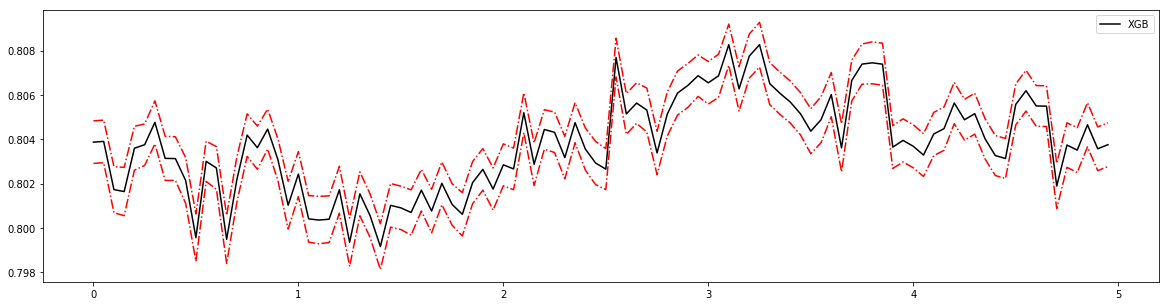

In [51]:
axisx = np.arange(0,5,0.05)
rs = []
var=[]
ge =[]
for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,gamma=i)
    cvresult =  CVS(reg,xtrain,ytrain,cv=cv)
    # 记录1- 偏差
    rs.append(cvresult.mean())
    # 记录方差
    var.append(cvresult.var())
    # 计算泛化误差的可控部分
    ge.append((1-cvresult.mean())**2+cvresult.var())

# 打印R2最高对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])

# 打印R2最低对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))

# # 打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.1

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
# 添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [55]:
import xgboost as xgb 

dfull = xgb.DMatrix(x,y)

# 设定参数,默认评估指标是rmse
param1 = {"silent":True,"obj":"reg:linear","ganmma":0}
num_round = 180
n_fold = 5

# 使用xgb.cv
curesult = xgb.cv(param1,dfull,num_round,n_fold)


In [57]:
#查看xgb.cv生成的结果
# 可以看到，随着树的增加，模型效果在一直变化
curesult

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.105578,0.129116,17.163215,0.584296
1,12.337973,0.097557,12.519736,0.473458
2,8.994071,0.065756,9.404534,0.472310
3,6.629481,0.050323,7.250335,0.500342
4,4.954406,0.033209,5.920812,0.591874
5,3.781454,0.029604,5.045190,0.687971
6,2.947767,0.038786,4.472030,0.686492
7,2.357748,0.042040,4.179314,0.737935
8,1.951907,0.044972,3.979878,0.798198
9,1.660895,0.044894,3.870751,0.812331


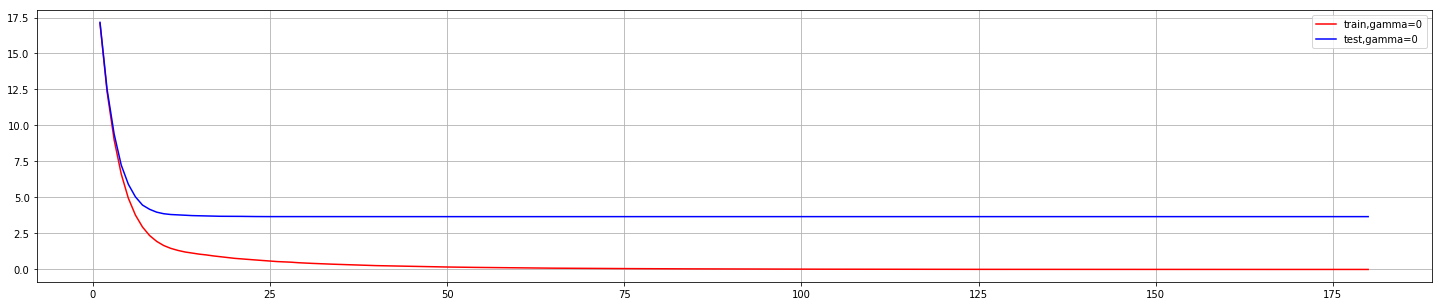

In [64]:
plt.figure(figsize=(25,5))
plt.grid()
plt.plot(range(1,181),curesult.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),curesult.iloc[:,2],c="blue",label="test,gamma=0")
plt.legend()
plt.show()

自定义评估指标，修改为mae

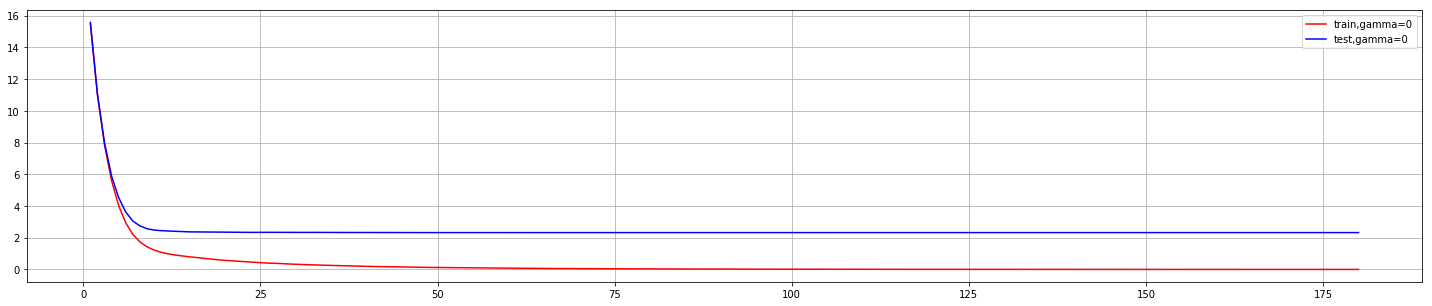

In [66]:
param1 = {"silent":True,"obj":"reg:linear","ganmma":0,"eval_metric":"mae"} # 修改为mae
num_round = 180
n_fold = 5

# 使用xgb.cv
curesult = xgb.cv(param1,dfull,num_round,n_fold)

plt.figure(figsize=(25,5))
plt.grid()
plt.plot(range(1,181),curesult.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),curesult.iloc[:,2],c="blue",label="test,gamma=0")
plt.legend()
plt.show()

由上图可以看到，随着树增加，训练集和测试集误差不再变化，有过拟合的迹象

增加惩罚项

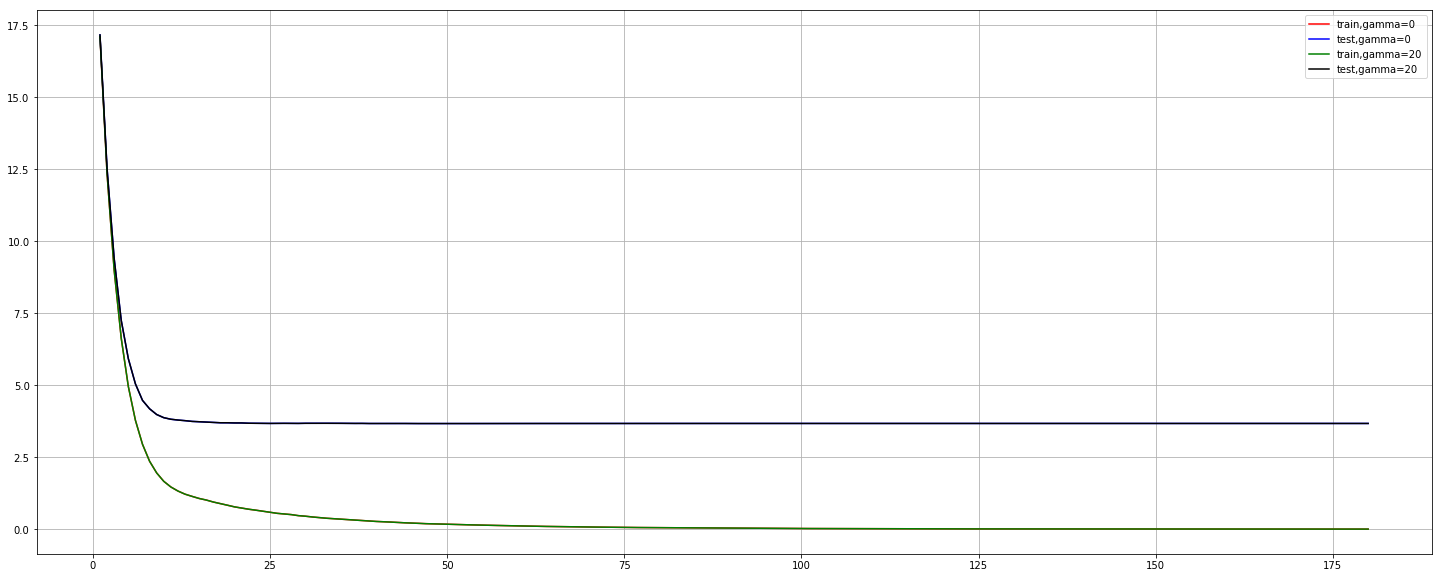

In [70]:
import xgboost as xgb 

dfull = xgb.DMatrix(x,y)

param1 = {"silent":True,"obj":"reg:linear","ganmma":0}
param2 = {"silent":True,"obj":"reg:linear","ganmma":20}
num_round = 180
n_fold = 5

# 使用xgb.cv
curesult1 = xgb.cv(param1,dfull,num_round,n_fold)

curesult2 = xgb.cv(param2,dfull,num_round,n_fold)


plt.figure(figsize=(25,10))
plt.grid()
plt.plot(range(1,181),curesult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),curesult1.iloc[:,2],c="blue",label="test,gamma=0")
plt.plot(range(1,181),curesult2.iloc[:,0],c="green",label="train,gamma=20")
plt.plot(range(1,181),curesult2.iloc[:,2],c="black",label="test,gamma=20")
plt.legend()
plt.show()

# gamma是通过控制训练集上的训练，来降低训练集的表现，从而降低与测试集上的差距

# 分类数据集，来查看gamma参数影响

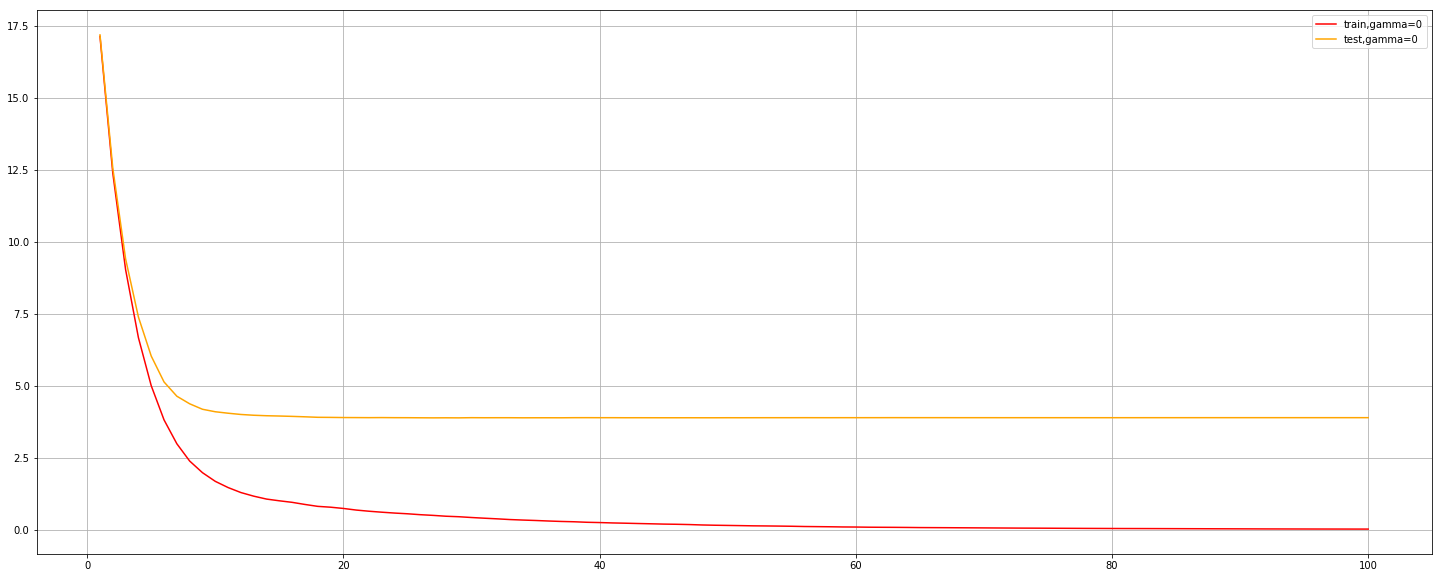

In [92]:
from sklearn.datasets import load_breast_cancer

data2 = load_breast_cancer()
x2 = data.data
y2 = data.target

dfull2 = xgb.DMatrix(x2,y2)

param1 ={"silent":True,"obj":"binary:logistic","ganmma":0,"nfold":5}
param2 ={"silent":True,"obj":"binary:logistic","ganmma":2,"nfold":5}

num_round = 100
curesult1 = xgb.cv(param1,dfull2,num_round)
curesult2 = xgb.cv(param2,dfull2,num_round)

plt.figure(figsize=(25,10))
plt.grid()
plt.plot(range(1,101),curesult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),curesult1.iloc[:,2],c="orange",label="test,gamma=0")
# plt.plot(range(1,101),curesult2.iloc[:,0],c="green",label="train,gamma=2")
# plt.plot(range(1,101),curesult2.iloc[:,2],c="blue",label="test,gamma=2")
plt.legend()
plt.show()

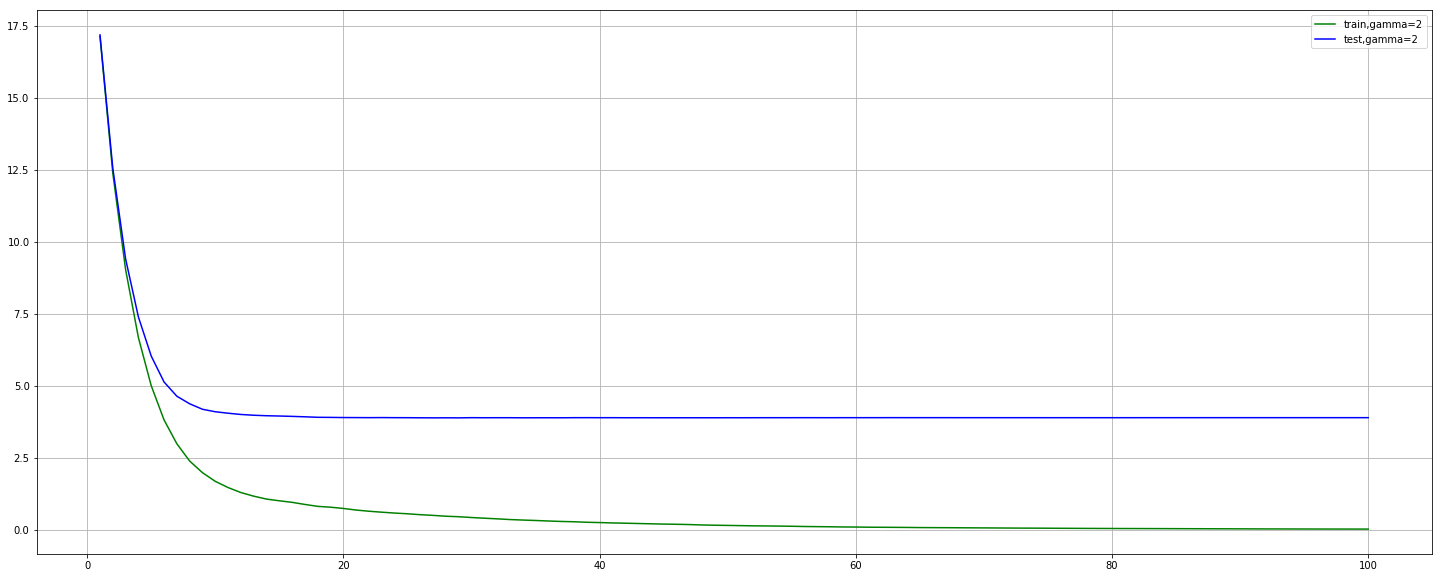

In [83]:
plt.figure(figsize=(25,10))
plt.grid()
# plt.plot(range(1,101),curesult1.iloc[:,0],c="red",label="train,gamma=0")
# plt.plot(range(1,101),curesult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,101),curesult2.iloc[:,0],c="green",label="train,gamma=2")
plt.plot(range(1,101),curesult2.iloc[:,2],c="blue",label="test,gamma=2")
plt.legend()
plt.show()

# 过拟合:使用xgb.cv剪枝参数与回归模型调参


作为天生过拟合的模型, XGBoost应用的核心之一就是减轻过拟合带来的影响。作为树模型,就是减轻过拟合的方式主
要是靠对决策树剪枝来降低模型的复杂度,以求降低方差。防止
过拟合的参数,包括复杂度控制，正则化的两个参数λ和x,控制送代速度的参数以及管理每次迭
代前进行的随机有放回抽样的参数 subsample,所有的这些参数都可以用来减轻过拟合。但除此之外,我们还有
几个影响重大的,专用于剪枝的参数:（1）树的最大深度；（2）每次生成树随机抽样特征的比例；（3）每次生成树的一层时，随机抽样特征的比例；（4）每次叶子节点时，随机抽样特征的比例；（5）一个叶子节点所需的最小hi，即叶子节点上的二阶导数之和，类似于样本权重。其中树的最大深度设置影响最大


In [93]:
data2 = load_breast_cancer()
x2 = data.data
y2 = data.target

dfull = xgb.DMatrix(x2,y2)

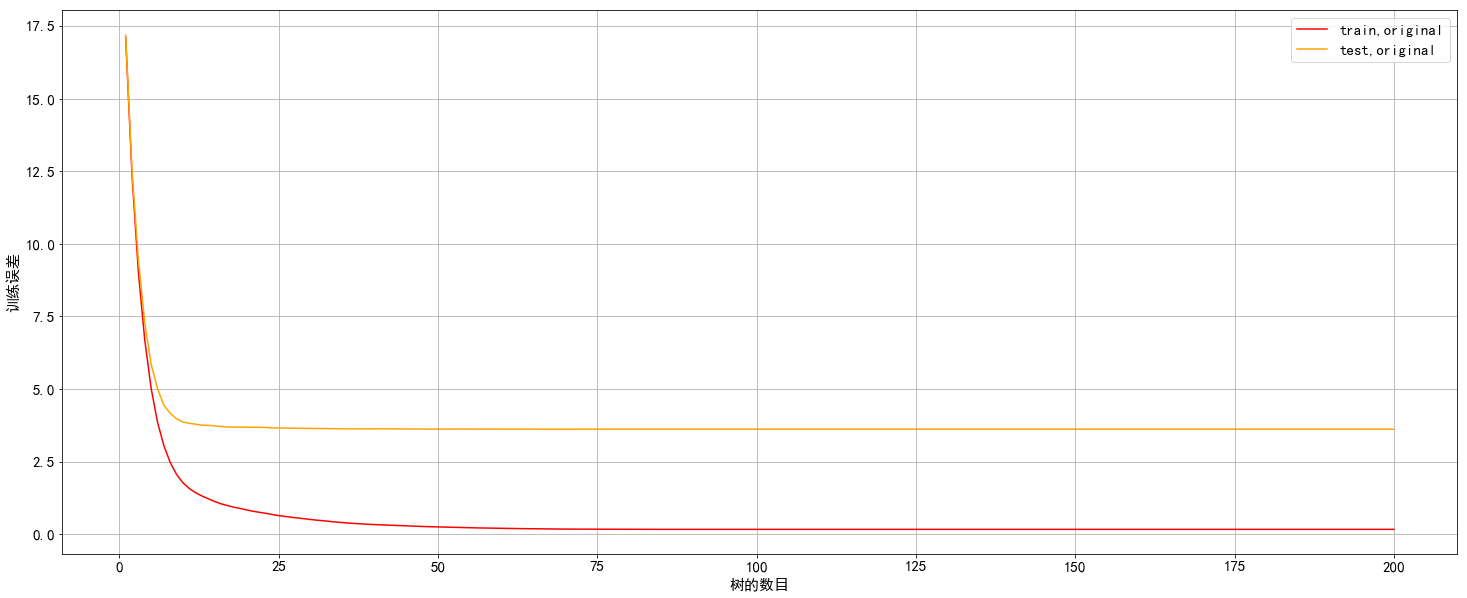

In [104]:
import matplotlib.pyplot as plt 
plt.rc('font', family='SimHei', size=15) 

param1 = {"silent":True
          ,"obj":"binary:logistic"
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"lambda":1
          ,"ganmma":0
          ,"alpha":1
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bylevel":1
          ,"nfold":5}

num_round = 200
n_fold = 5

# 使用xgb.cv
curesult = xgb.cv(param1,dfull,num_round,n_fold)

plt.figure(figsize=(25,10))
plt.grid()
plt.plot(range(1,201),curesult.iloc[:,0],c="red",label="train,original")
plt.plot(range(1,201),curesult.iloc[:,2],c="orange",label="test,original")
plt.xlabel("树的数目")
plt.ylabel("训练误差")
plt.legend()
plt.show()

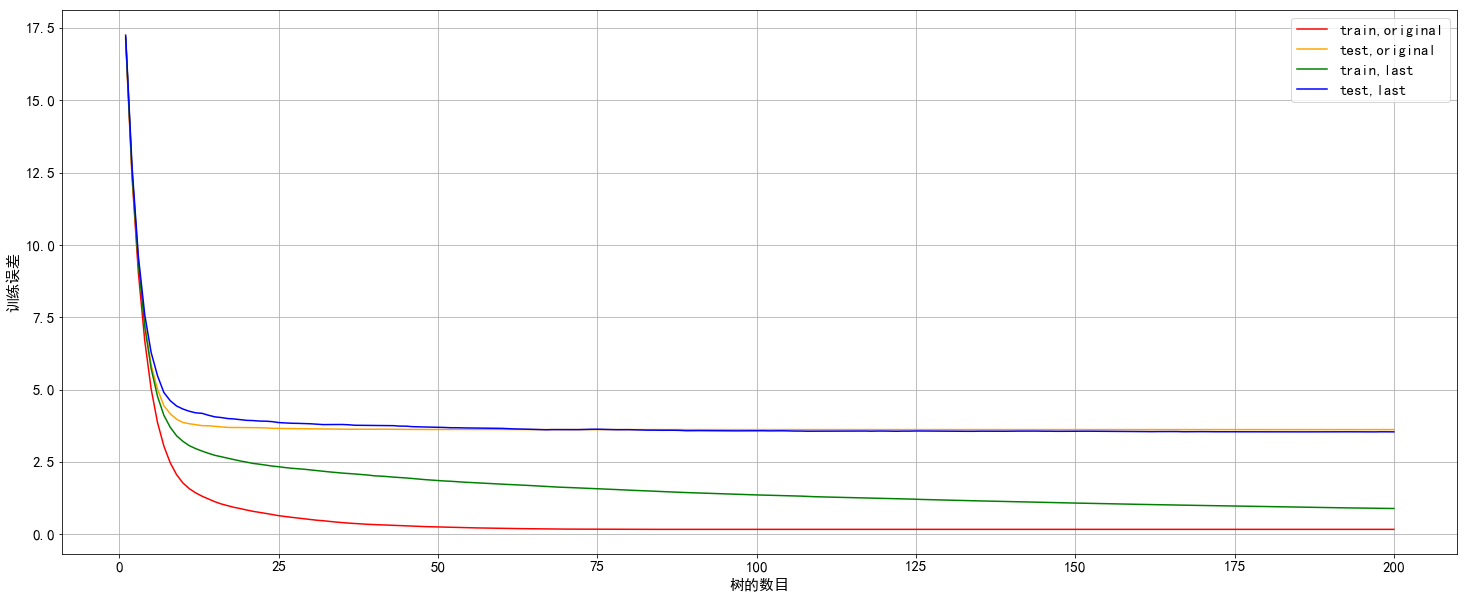

In [109]:
import matplotlib.pyplot as plt 
plt.rc('font', family='SimHei', size=15) 

param1 = {"silent":True
          ,"obj":"binary:logistic"
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"lambda":1
          ,"ganmma":0
          ,"alpha":1
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bylevel":1
          ,"nfold":5}

param2 = {"silent":True
          ,"obj":"binary:logistic"
          ,"max_depth":2
          ,"nfold":5}


num_round = 200
n_fold = 5

# 使用xgb.cv
curesult1 = xgb.cv(param1,dfull,num_round,n_fold)
curesult2 = xgb.cv(param2,dfull,num_round,n_fold)




plt.figure(figsize=(25,10))
plt.grid()
plt.plot(range(1,201),curesult1.iloc[:,0],c="red",label="train,original")
plt.plot(range(1,201),curesult1.iloc[:,2],c="orange",label="test,original")
plt.plot(range(1,201),curesult2.iloc[:,0],c="green",label="train,last")
plt.plot(range(1,201),curesult2.iloc[:,2],c="blue",label="test,last")
plt.xlabel("树的数目")
plt.ylabel("训练误差")
plt.legend()
plt.show()

# 可以看到训练表现提升，测试表现下降，模型有明显的过拟合改善效果